<a href="https://colab.research.google.com/github/JDonahue44/Project-2---NBA-2016-Draft/blob/main/Copy_of_Project_2_Part_4%20-%20Post%20Comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import set_config
set_config(display='diagram')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
filename = '/content/2016_nba_draft_combine.csv'

In [4]:
df = pd.read_csv(filename)
df

,Unnamed: 0,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,0,A.J. English,2016,NaN,74.00,75.00,82.00,98.5,35.5,134.0,29.5,128.0,182.0,5.3,8.75,8.50,NaN,12.27,3.28
1,1,Ben Bentil,2016,51.0,79.25,80.25,85.50,105.0,33.0,138.0,29.0,134.0,229.0,9.7,9.50,10.00,NaN,11.16,3.30
2,2,Brice Johnson,2016,25.0,81.00,82.50,84.50,106.5,38.0,144.5,33.5,140.0,209.0,7.5,9.00,8.25,NaN,11.88,3.20
3,3,Buddy Hield,2016,6.0,75.75,77.00,81.25,101.0,NaN,NaN,NaN,NaN,212.0,6.1,8.50,9.00,NaN,NaN,NaN
4,4,Caleb Swanigan,2016,NaN,79.50,80.50,87.50,107.0,29.0,136.0,26.0,133.0,247.0,12.6,9.00,10.25,NaN,12.80,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,56,Troy Williams,2016,NaN,77.75,78.75,80.25,102.0,36.0,138.0,30.0,132.0,218.0,10.0,8.25,9.25,NaN,10.72,3.35
57,57,Tyler Ulis,2016,34.0,68.75,70.00,74.00,88.5,38.0,126.5,32.5,121.0,149.0,5.2,7.50,7.50,NaN,10.80,3.20
58,58,Wade Baldwin,2016,17.0,74.50,76.00,83.25,100.0,38.0,138.0,32.5,132.5,202.0,5.2,9.00,9.75,NaN,10.45,3.19
59,59,Wayne Selden,2016,NaN,76.25,77.75,82.50,101.0,NaN,NaN,NaN,NaN,232.0,7.3,9.00,9.25,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                61 non-null     int64  
 1   Player                    61 non-null     object 
 2   Year                      61 non-null     int64  
 3   Draft pick                38 non-null     float64
 4   Height (No Shoes)         61 non-null     float64
 5   Height (With Shoes)       61 non-null     float64
 6   Wingspan                  61 non-null     float64
 7   Standing reach            61 non-null     float64
 8   Vertical (Max)            49 non-null     float64
 9   Vertical (Max Reach)      49 non-null     float64
 10  Vertical (No Step)        49 non-null     float64
 11  Vertical (No Step Reach)  49 non-null     float64
 12  Weight                    60 non-null     float64
 13  Body Fat                  60 non-null     float64
 14  Hand (Length

In [6]:
df.duplicated().sum()

0

In [7]:
df = df.drop('Unnamed: 0', axis = 1)
print(df.head())

           Player  Year  Draft pick  Height (No Shoes)  Height (With Shoes)  \
0    A.J. English  2016         NaN              74.00                75.00   
1      Ben Bentil  2016        51.0              79.25                80.25   
2   Brice Johnson  2016        25.0              81.00                82.50   
3     Buddy Hield  2016         6.0              75.75                77.00   
4  Caleb Swanigan  2016         NaN              79.50                80.50   

   Wingspan  Standing reach  Vertical (Max)  Vertical (Max Reach)  \
0     82.00            98.5            35.5                 134.0   
1     85.50           105.0            33.0                 138.0   
2     84.50           106.5            38.0                 144.5   
3     81.25           101.0             NaN                   NaN   
4     87.50           107.0            29.0                 136.0   

   Vertical (No Step)  Vertical (No Step Reach)  Weight  Body Fat  \
0                29.5                    

In [8]:
df = df.drop('Year', axis = 1)
print(df.head())

           Player  Draft pick  Height (No Shoes)  Height (With Shoes)  \
0    A.J. English         NaN              74.00                75.00   
1      Ben Bentil        51.0              79.25                80.25   
2   Brice Johnson        25.0              81.00                82.50   
3     Buddy Hield         6.0              75.75                77.00   
4  Caleb Swanigan         NaN              79.50                80.50   

   Wingspan  Standing reach  Vertical (Max)  Vertical (Max Reach)  \
0     82.00            98.5            35.5                 134.0   
1     85.50           105.0            33.0                 138.0   
2     84.50           106.5            38.0                 144.5   
3     81.25           101.0             NaN                   NaN   
4     87.50           107.0            29.0                 136.0   

   Vertical (No Step)  Vertical (No Step Reach)  Weight  Body Fat  \
0                29.5                     128.0   182.0       5.3   
1       

In [9]:
df = df.drop('Height (With Shoes)', axis = 1)
print(df.head())

           Player  Draft pick  Height (No Shoes)  Wingspan  Standing reach  \
0    A.J. English         NaN              74.00     82.00            98.5   
1      Ben Bentil        51.0              79.25     85.50           105.0   
2   Brice Johnson        25.0              81.00     84.50           106.5   
3     Buddy Hield         6.0              75.75     81.25           101.0   
4  Caleb Swanigan         NaN              79.50     87.50           107.0   

   Vertical (Max)  Vertical (Max Reach)  Vertical (No Step)  \
0            35.5                 134.0                29.5   
1            33.0                 138.0                29.0   
2            38.0                 144.5                33.5   
3             NaN                   NaN                 NaN   
4            29.0                 136.0                26.0   

   Vertical (No Step Reach)  Weight  Body Fat  Hand (Length)  Hand (Width)  \
0                     128.0   182.0       5.3           8.75          8.50

In [10]:
df = df.drop('Bench', axis = 1)
print(df.head())

           Player  Draft pick  Height (No Shoes)  Wingspan  Standing reach  \
0    A.J. English         NaN              74.00     82.00            98.5   
1      Ben Bentil        51.0              79.25     85.50           105.0   
2   Brice Johnson        25.0              81.00     84.50           106.5   
3     Buddy Hield         6.0              75.75     81.25           101.0   
4  Caleb Swanigan         NaN              79.50     87.50           107.0   

   Vertical (Max)  Vertical (Max Reach)  Vertical (No Step)  \
0            35.5                 134.0                29.5   
1            33.0                 138.0                29.0   
2            38.0                 144.5                33.5   
3             NaN                   NaN                 NaN   
4            29.0                 136.0                26.0   

   Vertical (No Step Reach)  Weight  Body Fat  Hand (Length)  Hand (Width)  \
0                     128.0   182.0       5.3           8.75          8.50

In [11]:
df.isna().sum()

Player                       0
Draft pick                  23
Height (No Shoes)            0
Wingspan                     0
Standing reach               0
Vertical (Max)              12
Vertical (Max Reach)        12
Vertical (No Step)          12
Vertical (No Step Reach)    12
Weight                       1
Body Fat                     1
Hand (Length)                0
Hand (Width)                 0
Agility                     12
Sprint                      13
dtype: int64

In [12]:
df['Wingspan'] = df['Wingspan']. astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Player                    61 non-null     object 
 1   Draft pick                38 non-null     float64
 2   Height (No Shoes)         61 non-null     float64
 3   Wingspan                  61 non-null     int64  
 4   Standing reach            61 non-null     float64
 5   Vertical (Max)            49 non-null     float64
 6   Vertical (Max Reach)      49 non-null     float64
 7   Vertical (No Step)        49 non-null     float64
 8   Vertical (No Step Reach)  49 non-null     float64
 9   Weight                    60 non-null     float64
 10  Body Fat                  60 non-null     float64
 11  Hand (Length)             61 non-null     float64
 12  Hand (Width)              61 non-null     float64
 13  Agility                   49 non-null     float64
 14  Sprint      

In [13]:
pick_to_wingspan = df.groupby(['Wingspan'])['Draft pick'].nunique()

In [14]:
uniqueDraftpick = np.array(pick_to_wingspan.index)
uniqueDraftpick

array([74, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 91])

In [15]:
uniqueWingspan = np.array(pick_to_wingspan.index)
uniqueWingspan

array([74, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 91])

In [16]:
X = df.drop(columns=['Wingspan'])
y = df['Wingspan']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [19]:
num_columns = num_selector(X_train)
cat_columns = cat_selector(X_train)

In [20]:
print('numeric columns are', num_columns)
print('categorical columns are', cat_columns)

numeric columns are ['Draft pick', 'Height (No Shoes)', 'Standing reach', 'Vertical (Max)', 'Vertical (Max Reach)', 'Vertical (No Step)', 'Vertical (No Step Reach)', 'Weight', 'Body Fat', 'Hand (Length)', 'Hand (Width)', 'Agility', 'Sprint']
categorical columns are ['Player']


In [21]:
mean_imputer = SimpleImputer(strategy = 'mean')
mean_imputer.fit(X_train[num_columns])

SimpleImputer()

In [22]:
X_train.loc[:, num_columns] = mean_imputer.transform(X_train[num_columns])
X_test.loc[:, num_columns] = mean_imputer.transform(X_test[num_columns])

In [23]:
constant_imputer = SimpleImputer(strategy='constant', fill_value = 'missing')
constant_imputer.fit(X_train[cat_columns])

SimpleImputer(fill_value='missing', strategy='constant')

In [24]:
X_train.loc[:, cat_columns] = constant_imputer.transform(X_train[cat_columns])
X_test.loc[:, cat_columns] = constant_imputer.transform(X_test[cat_columns])

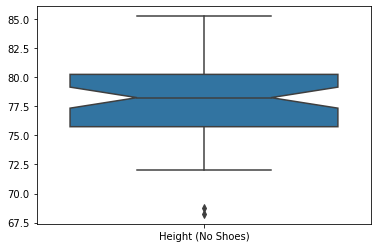

In [25]:
sns.boxplot(data = df.loc[:, ['Height (No Shoes)']], notch = True)

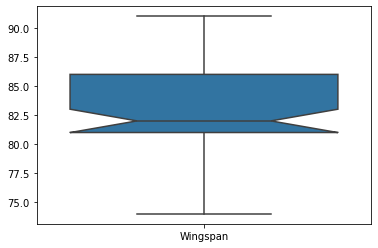

In [26]:
sns.boxplot(data = df.loc[:, ['Wingspan']], notch = True)

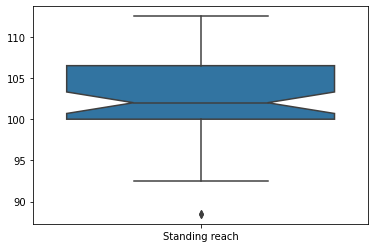

In [27]:
sns.boxplot(data = df.loc[:, ['Standing reach']], notch = True)

<function matplotlib.pyplot.show>

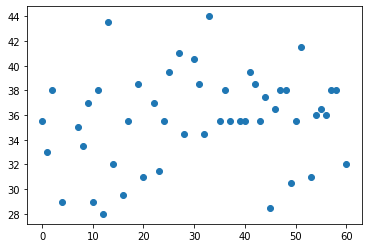

In [28]:
plt.scatter(df.index,df['Vertical (Max)'])
plt.show

<function matplotlib.pyplot.show>

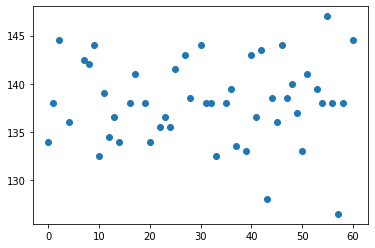

In [29]:
plt.scatter(df.index,df['Vertical (Max Reach)'])
plt.show

<function matplotlib.pyplot.show>

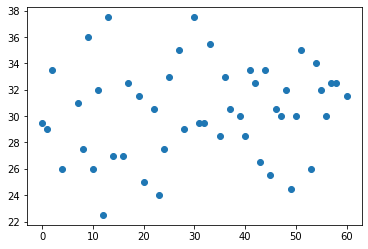

In [30]:
plt.scatter(df.index,df['Vertical (No Step)'])
plt.show

<function matplotlib.pyplot.show>

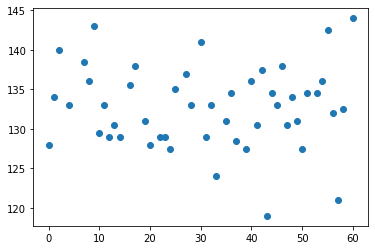

In [31]:
plt.scatter(df.index,df['Vertical (No Step Reach)'])
plt.show

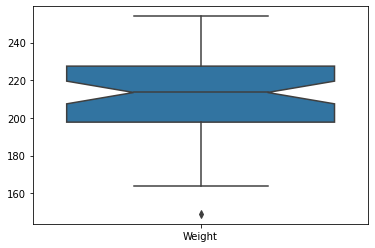

In [32]:
sns.boxplot(data = df.loc[:, ['Weight']], notch = True)

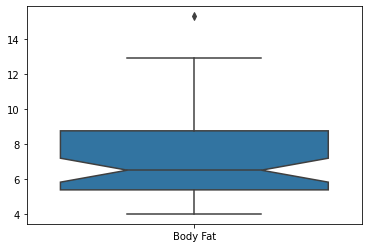

In [33]:
sns.boxplot(data = df.loc[:, ['Body Fat']], notch = True)

<function matplotlib.pyplot.show>

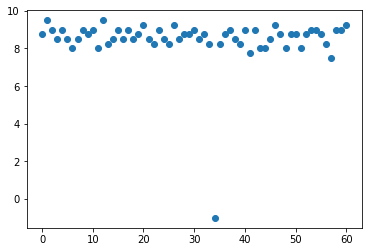

In [34]:
plt.scatter(df.index,df['Hand (Length)'])
plt.show

<function matplotlib.pyplot.show>

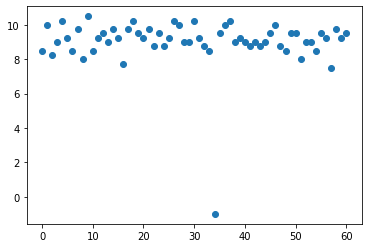

In [35]:
plt.scatter(df.index,df['Hand (Width)'])
plt.show

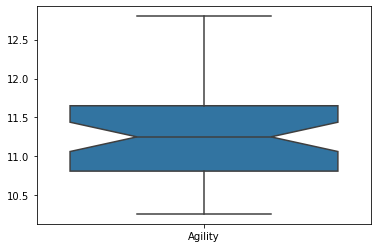

In [36]:
sns.boxplot(data = df.loc[:, ['Agility']], notch = True)

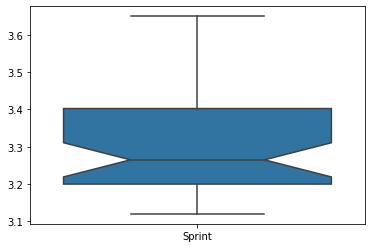

In [37]:
sns.boxplot(data = df.loc[:, ['Sprint']], notch = True)

The First step I took was to drop import my dataset. I shortly followed that step with the decision to drop columns from my dataset that weren't relevant to my data including: Unnamed: 0, Year, Height (With Shoes) & Bench. I decided to use these imputers in my data because I didn't want these missing pieces of data to skew what I was working with. As I was going through my data visualizations, a couple of outliers stood out to me : Body Fat & Height with no shoes. It was interesting to see the variation of the plyer body types that were drafted in this data set.

<function matplotlib.pyplot.show>

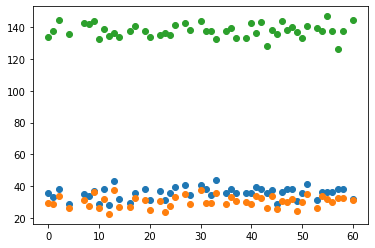

In [38]:
plt.scatter(df.index,df['Vertical (Max)'])
plt.scatter(df.index,df['Vertical (No Step)'])
plt.scatter(df.index,df['Vertical (Max Reach)'])
plt.show

<function matplotlib.pyplot.show>

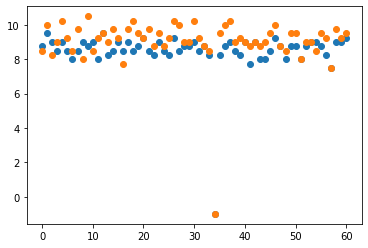

In [39]:
plt.scatter(df.index,df['Hand (Length)'])
plt.scatter(df.index,df['Hand (Width)'])
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Draft Pick Wingspan')

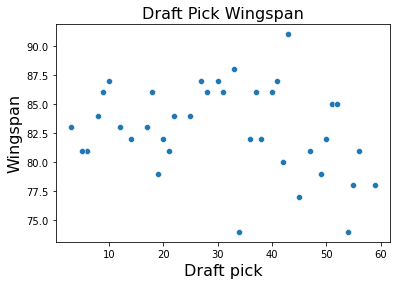

In [40]:
sns.scatterplot(df['Draft pick'], df['Wingspan'])
plt.xlabel('Draft pick', fontsize = 16)
plt.ylabel('Wingspan', fontsize = 16)
plt.title('Draft Pick Wingspan', fontsize = 16)

I wanted to do some research on how the wingspan of players effects their draft position. We can see from this model that most of the players drafted in the beginning portion of the draft have a wingspan of 80 or above besides 1 outlier. Once we cross the halfway point in the draft there is a much higher chance of a player's wingspan being below 80.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Draft Pick Body Fat')

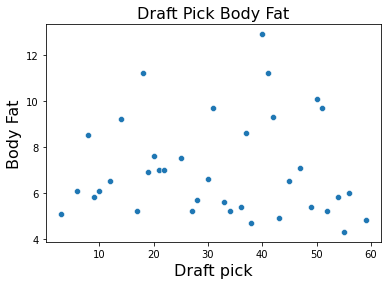

In [41]:
sns.scatterplot(df['Draft pick'], df['Body Fat'])
plt.xlabel('Draft pick', fontsize = 16)
plt.ylabel('Body Fat', fontsize = 16)
plt.title('Draft Pick Body Fat', fontsize = 16)

In this Chart we can see that there alot of player who were drafted had a low body fat percentage, and very few were actually above 10%

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [43]:
encoder = OneHotEncoder(sparse=False, handle_unknown= 'ignore')

In [44]:
scaler = StandardScaler()

In [45]:
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [46]:
categorical_pipe = make_pipeline(constant_imputer, encoder)
categorical_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [47]:
num_tuple = (numeric_pipe, num_selector)
cat_tuple = (categorical_pipe, cat_selector)

In [48]:
preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fac463ee090>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fac463eee10>)])

In [49]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fac463ee090>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fac463eee10>)])

In [50]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [51]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (45, 58)




array([[ 3.63214387e-01,  9.50084044e-01,  1.33676033e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.58529925e-16, -1.39902486e+00, -1.51727176e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.77812416e+00, -1.71223938e+00, -1.18796036e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-5.58529925e-16,  7.93476784e-01,  3.48826143e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.58529925e-16, -3.02774036e-01, -6.39108039e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.05169539e+00, -7.72595816e-01, -4.19567109e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [52]:
column_transformer = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')

In [53]:
reg = LinearRegression()

In [54]:
reg_pipe = make_pipeline(column_transformer, reg)

In [55]:
reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fac463ee090>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fac463eee10>)])),
                ('linearregression', LinearRegression())])

In [56]:
reg_pipe.predict(X_test)

array([78.86052968, 81.38931995, 86.32027944, 79.47916059, 77.16215645,
       87.58715438, 69.12141661, 85.35535445, 85.08398757, 84.36621637,
       72.97596761, 82.53997656, 86.03782303, 81.85791391, 85.80724053,
       85.27253062])

In [57]:
train_score = reg_pipe.score(X_train, y_train)
test_score = reg_pipe.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.26967906594140667


In [58]:
train_pred = reg_pipe.predict(X_train)
test_pred = reg_pipe.predict(X_test)

In [59]:
train_MAE = mean_absolute_error(y_train, train_pred)
test_MAE = mean_absolute_error(y_test, test_pred)

In [87]:
print(f'Model Training MAE:{train_MAE}')
print(f'Model Testing MAE: {test_MAE}')

Model Training MAE:4.105358028836134e-15
Model Testing MAE: 1.7936301346318686


In [88]:
train_MSE = mean_squared_error(y_train, train_pred)
test_MSE = mean_squared_error(y_test, test_pred)

In [89]:
print(f'Model Training MSE:{train_MSE}')
print(f'Model Testing MSE: {test_MSE}')

Model Training MSE:6.731613057885967e-29
Model Testing MSE: 10.723735902836923


In [90]:
train_RMSE = np.sqrt(train_MSE)
test_RMSE = np.sqrt(test_MSE)

In [91]:
print(f'Model Training RMSE:{train_RMSE}')
print(f'Model Testing RMSE: {test_RMSE}')

Model Training RMSE:8.204640795236539e-15
Model Testing RMSE: 3.2747115755188156


In [60]:
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

In [61]:
print(f'Model Training R2: {train_r2}')
print(f'Model Testing R2: {test_r2}')

Model Training R2: 1.0
Model Testing R2: 0.26967906594140667


In [62]:
dec_tree = DecisionTreeRegressor(random_state = 42)

In [63]:
dec_tree_pipe = make_pipeline(column_transformer, dec_tree)

In [64]:
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fac463ee090>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fac463eee10>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [65]:
dec_tree_pipe.predict(X_test)

array([77., 79., 88., 79., 74., 86., 82., 87., 82., 88., 74., 83., 86.,
       82., 84., 86.])

In [66]:
train_score = dec_tree_pipe.score(X_train, y_train)
test_score = dec_tree_pipe.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.6424581005586592


In [67]:
dec_tree_pipe.get_params()

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('pipeline-1',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer()),
                                                  ('standardscaler',
                                                   StandardScaler())]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fac463ee090>),
                                 ('pipeline-2',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(fill_value='missing',
                                                                 strategy='constant')),
                                                  ('onehotencoder',
                                                   OneHotEncoder(handle_unknown='ignore',
                                        

In [68]:
dec_tree.get_depth()

7

In [69]:
# How many leaf nodes?
dec_tree.get_n_leaves()

24

In [70]:
dec_tree_2 = DecisionTreeRegressor(max_depth = 22, random_state = 24)

In [71]:
dec_tree_pipe_2 = make_pipeline(column_transformer, dec_tree_2)

In [72]:
dec_tree_pipe_2.fit(X_train, y_train)
train_2_score = dec_tree_pipe_2.score(X_train, y_train)
test_2_score = dec_tree_pipe_2.score(X_test, y_test)
print(train_2_score)
print(test_2_score)

1.0
0.7275871242351689


In [73]:
knn = KNeighborsRegressor(n_neighbors = 25)

In [74]:
knn_pipe = make_pipeline(column_transformer, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fac463ee090>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fac463eee10>)])),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=25))])

In [75]:
predictions = knn_pipe.predict(X_test)
predictions

array([81.04, 81.96, 83.88, 81.16, 80.56, 83.84, 80.88, 83.8 , 83.8 ,
       83.52, 80.12, 82.4 , 83.72, 82.2 , 83.88, 83.12])

In [76]:
acc_score = knn_pipe.score(X_test, y_test)
acc_score

0.5068101090715609

In [77]:
df_2 = df[['Wingspan', 'Draft pick']]
df_2.head()

,Wingspan,Draft pick
0,82,NaN
1,85,51.0
2,84,25.0
3,81,6.0
4,87,NaN


In [78]:
scaler = StandardScaler()
scaled_df2 = scaler.fit_transform(df_2)

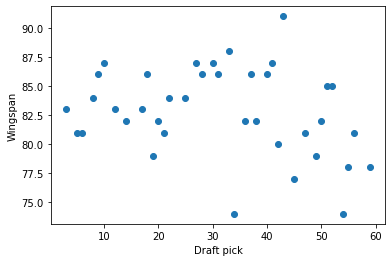

In [79]:
plt.scatter(df['Draft pick'], df['Wingspan'])
plt.xlabel('Draft pick')
plt.ylabel('Wingspan');

In [80]:
pca = PCA(n_components=.95)

In [81]:
PCA_pipe = make_pipeline(scaler, pca)
PCA_pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95))])

In [82]:
knn = KNeighborsRegressor(n_neighbors=1)

In [83]:
knn_pca_pipe = make_pipeline(preprocessor, pca, knn)
knn_pca_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fac463ee090>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fac463eee10>)])),
                ('pca', PCA(n_components=0.95)),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=1))])

In [84]:
predictions_2 = knn_pca_pipe.predict(X_test)
predictions_2

array([80., 79., 88., 80., 78., 88., 74., 82., 82., 88., 78., 82., 86.,
       83., 82., 88.])

In [85]:
acc_score_2 = knn_pca_pipe.score(X_test, y_test)
acc_score_2

0.24660814046288904